In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, r2_score, \
mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

- X: Independent variable, predictor
- y: dependent variable, target

X1, X2 correlated: colinearity, 0.9

## Cleaning

In [11]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [12]:
df.duplicated().sum()

0

## Exploration

In [14]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [21]:
columns = ['ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']
new_df = df[columns].copy()

In [24]:
new_df.head(2)

,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,AS5,Z,9.9,196
1,2.4,4,M6,Z,11.2,221


In [26]:
new_df.TRANSMISSION.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

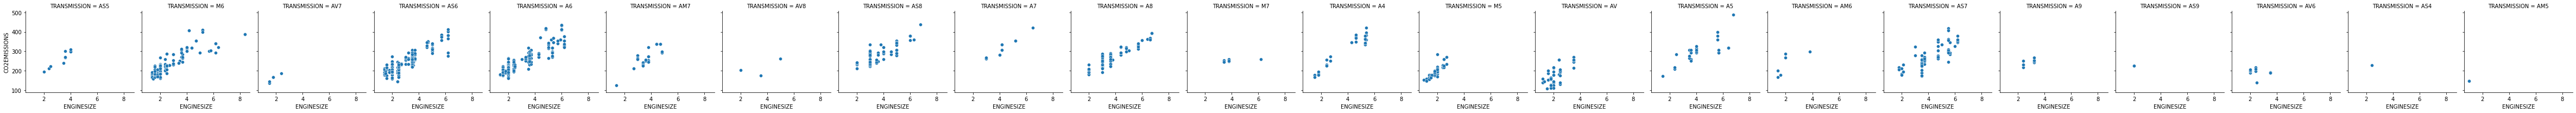

In [29]:
g = sns.FacetGrid(data=new_df, col='TRANSMISSION')
g.map(sns.scatterplot, 'ENGINESIZE', 'CO2EMISSIONS');

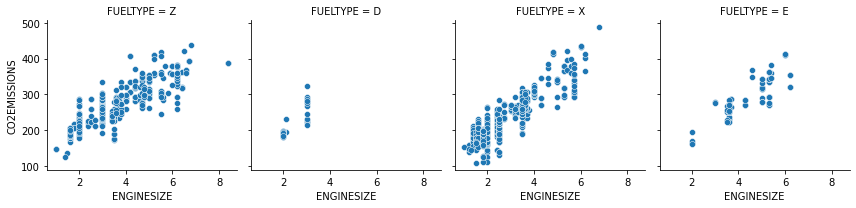

In [30]:
g = sns.FacetGrid(data=new_df, col='FUELTYPE')
g.map(sns.scatterplot, 'ENGINESIZE', 'CO2EMISSIONS');

In [31]:
columns = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']
new_df = df[columns].copy()

![](https://lh6.googleusercontent.com/SL2LBLMlOMzxXnC5TYzk2NO1dNVvfM3lDJBBiInrzD3FBoZerMPN-XmZrYgHh6Z9DY7C5y22RJ7a1ntqQfMYXxO0Wn6RtUdJj1R92fgOk7VylLUqNlnS0gGJjWonU3JbirrX4zM)

![](https://www.freecodecamp.org/news/content/images/2020/07/positive_plots.png)

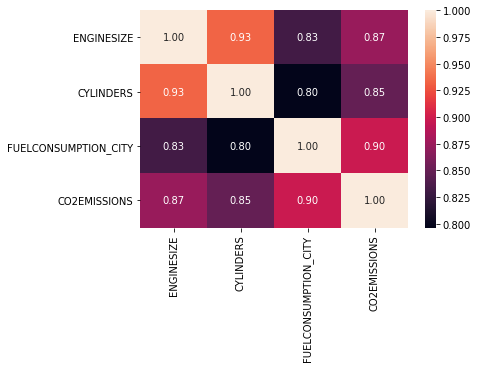

In [40]:
sns.heatmap(new_df.corr(), fmt='.2f', annot=True);

- https://www.mathsisfun.com/data/standard-deviation.html)

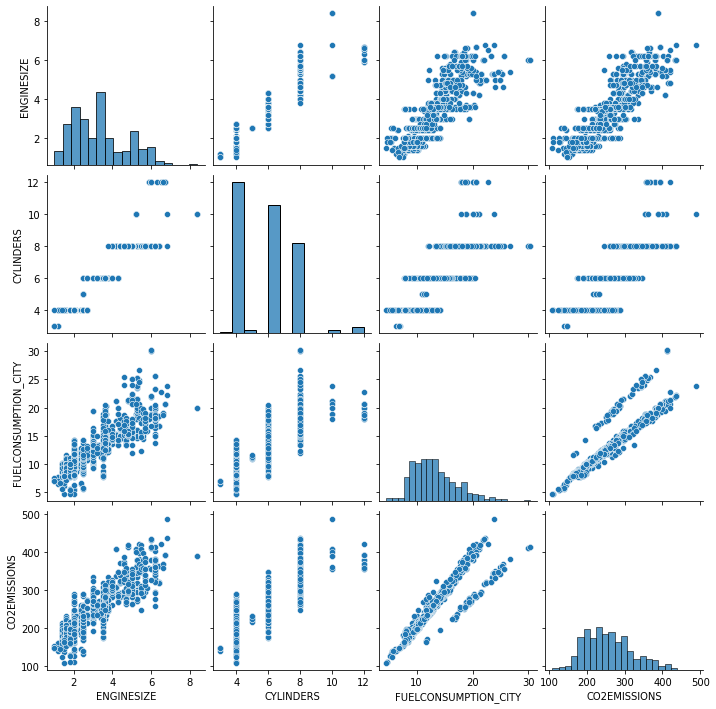

In [41]:
sns.pairplot(data=new_df);

## Modeling

- Parameter: tham số 
- Hyperparameter: tuning model cho chính xác

y = 3x + 2, y = 3.2x + 2 --> y = 3.0001x + 2.00003

(0, 2)
(1, 5)
(2, 8)

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['FUELCONSUMPTION_CITY']], new_df.CO2EMISSIONS, 
                                                    test_size=0.15, shuffle=True, random_state=4)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

In [46]:
linear_regression = LinearRegression(normalize=True)
linear_regression.fit(X_train, y_train)

LinearRegression(normalize=True)

In [47]:
y_predicted = linear_regression.predict(X_test)

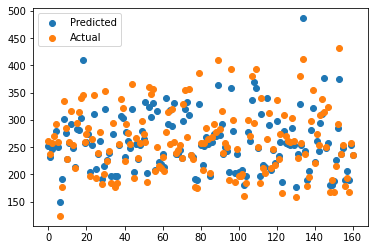

In [58]:
x = np.arange(len(y_predicted))
plt.scatter(x, y_predicted, label='Predicted')
plt.scatter(x, y_test.values, label='Actual')
plt.legend()
plt.show()

In [51]:
pd.options.display.max_rows = 50

In [53]:
pd.DataFrame({'predicted': y_predicted, 'actual': y_test}).head(50)

,predicted,actual
834,251.703196,262
66,231.029147,237
983,246.190116,258
849,254.459736,271
110,279.268596,292
994,250.324926,260
1042,149.711218,124
862,191.059317,177
545,301.320915,334
558,275.133786,285


![](https://econbrowser.com/wp-content/uploads/2019/07/msemae.png)

![](https://miro.medium.com/max/1200/1*_HbrAW-tMRBli6ASD5Bttw.png)

![](https://miro.medium.com/max/2812/1*o6okB-rex13szaQYNiHeKQ.png)

In [59]:
mean_absolute_error(y_test.values, y_predicted)

18.864972595747062

In [61]:
np.sqrt(mean_squared_error(y_test.values, y_predicted))

26.420159507648155

In [63]:
r2_score(y_test.values, y_predicted) * 100

80.78005675807022

## Equation

$$\text{CO2 Emission} = 13.783 * \text{Fuel Consumption} + 72.528$$

In [66]:
linear_regression.coef_

array([13.78269976])

In [67]:
linear_regression.intercept_

72.52809930666584

In [74]:
for i in X_test.iloc[:3].FUELCONSUMPTION_CITY.values:
    print(linear_regression.coef_[0] * i + linear_regression.intercept_)

251.7031961671665
231.02914652941644
246.19011626376647


In [68]:
y_predicted[:3]

array([251.70319617, 231.02914653, 246.19011626])

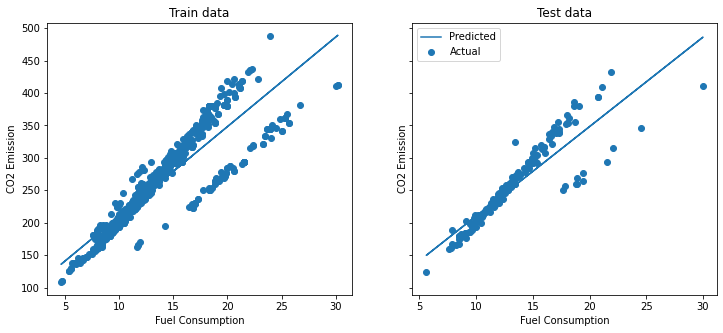

In [89]:
_, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].scatter(x=X_train.FUELCONSUMPTION_CITY.values, y=y_train.values)
axes[0].plot(X_train.FUELCONSUMPTION_CITY.values, linear_regression.predict(X_train))
axes[0].set(title='Train data', xlabel='Fuel Consumption', ylabel='CO2 Emission')

axes[1].scatter(x=X_test.FUELCONSUMPTION_CITY.values, y=y_test.values, label='Actual')
axes[1].plot(X_test.FUELCONSUMPTION_CITY.values, y_predicted, label='Predicted')
axes[1].set(title='Test data', xlabel='Fuel Consumption', ylabel='CO2 Emission')

plt.legend()
plt.show()